# Hiperwind Summer School 2023 - Project template

Through this work, you will reinforce your knowledge by applying the concepts explained during the lectures.

You are expected to complete the following steps:

1. Create a Python environments and screen the datasets
2. Fit a distribution based on environmental data
3. Train a surrogate model 
4. Estimate the reliability of a structural component 

## 1. Create a Python environment and screen datasets

* Make sure you have Python installed on your computer. We recommend you to install Python 10 to avoid any incompatibilities. The instructions are listed in the main [readme](../README.md)

* Create and activate the environment

* Install the required packages


Run the following script to make sure you have installed all required packages:

In [1]:
! python ../test_packages.py

Success: all packages are correctly installed


You are now ready to go!

### Scatter plots

To understand and observe potential trends, represent with scatter plots the data contained in the dataset:

PhDSchool/data/phd_school_input_output_data_clean.csv

More details can be found on the [readme file](../data/READ_ME.txt). 

In [2]:
### your code here ###

### Testing openTurns

You will test here some essential packages are correctly installed by partially running an [uncertainty propagation exercise](../exercises/OpenTURNS/exported_as_python_scripts/UQ_with_OpenTURNS_Beam.py) .

deflection([70000000000.0, 300, 2.5, 1.5e-07]) = [0.14881]


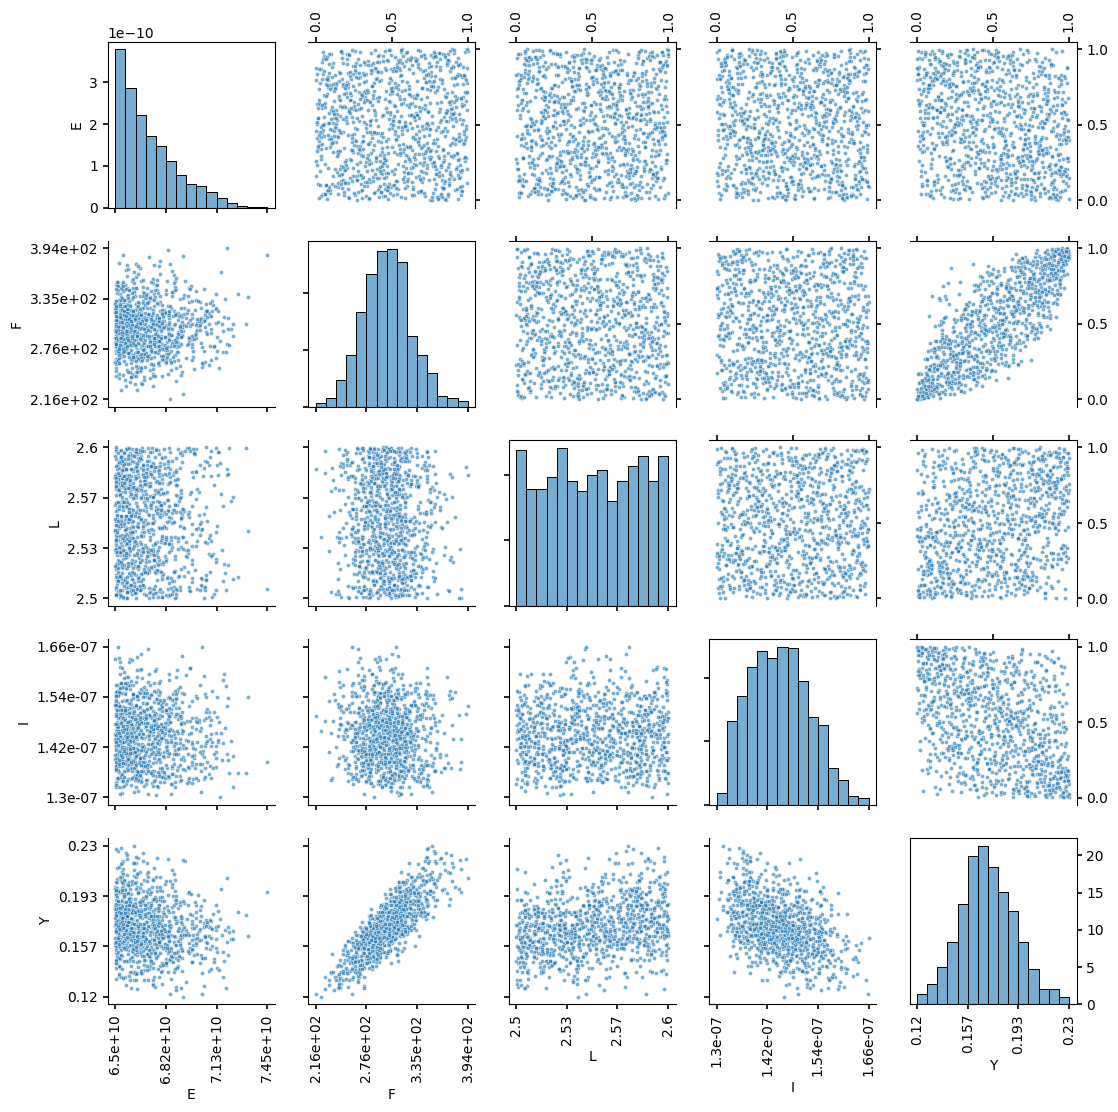

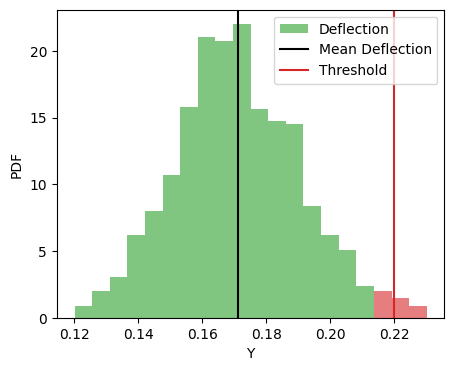

In [13]:
import numpy as np
import pandas as pd
import openturns as ot
import copulogram as cp 
import matplotlib.pyplot as plt
import openturns.viewer as viewer

# [Step A]: model definition

deflection_function = ot.SymbolicFunction(['E', 'F', 'L', 'I'], ['F*L^3/(3*E*I)'])

# Testing the function
x_test = [7e+10, 300, 2.5, 1.5e-07]
print(f"deflection({x_test}) = {deflection_function(x_test)}")

# [Step B]: uncertainty model definition

E = ot.Beta(0.9, 3.5, 6.5e+10, 7.5e+10)
F = ot.LogNormalMuSigma(300, 30, 0.0).getDistribution()
L = ot.Uniform(2.5, 2.6)
I = ot.Beta(2.5, 4., 1.3e-07, 1.7e-07)
marginals = [E, F, L, I]
joint_distribution = ot.ComposedDistribution(marginals)
joint_distribution.setDescription(['E', 'F', 'L', 'I'])
dim = joint_distribution.getDimension()
joint_distribution

# [Step C]: uncertainty propagation
size = 1000
x_MC_sample = joint_distribution.getSample(size)
y_MC_sample = deflection_function(x_MC_sample)

# Data visualization

data = pd.DataFrame(np.array(x_MC_sample), columns=list(joint_distribution.getDescription()))
data['Y'] = np.array(y_MC_sample)
copulogram = cp.Copulogram(data)
copulogram.draw(alpha=0.6, marker='.');

# %%
threshold = 0.22 # Material limit 1: cracks appear
#threshold = 0.3 # Material limit 2: rupture

# %%
fig, ax = plt.subplots(figsize=(5, 4))
N, bins, patches = ax.hist(data['Y'], bins=20, density=True, alpha=0.6, color='C2', label="Deflection")
for i in range(17, 20):
    patches[i].set_facecolor('C3')
plt.axvline(data['Y'].mean(), color='k', label="Mean Deflection")
plt.axvline(threshold, color='C3', label="Threshold")
plt.xlabel("Y")
plt.ylabel("PDF")
plt.legend();

## 2. Fit environmental data

## 3. Train a surrogate model

You will train surrogate model of your choice (Gaussian process, neural network, ...):

* Dataset: ../data/phd_school_input_output_data_clean.csv   
* Inputs:
    * U [m/s]: Average Wind Speed
    * SigmaU [m/s]: Standard Deviation of Stream-wise Velocity
    * Alpha [-]: Shear Exponent
    * Hs [m]: Significant Wave Height
    * Tp [s]: Wave Period
    * Density [kg/m3]: Air density
    * Yaw [deg]: Yaw Error
* Output:
    * Ch 17 Tower base moment Mx[kNm] SeqM3: Damage Equivalent Load for Tower base moment Mx with Woller Exponent 3 [kNm]


**Guidelines**

* Load the required packages
* Load the dataset
* Decide the test/train split if necessary
* Normalize input and output data
* Train the data-driven model
* Test the data-driven model (*on the test dataset*)
* Compute error metrics and visualize the results

In [15]:
### your code here ###

## 4. Estimate the reliability of a structural component

You will here estimate the reliability of a structural component relying on the surrogate model you trained in *step 3*. The environmental variables will, however, be defined here according to the distribution you have fit in *step 2*.

The limit state is defined as:

$ g = \Delta - \frac{1}{N_{short-term} \cdot k}\sum_{j = 1}^{N_{short-term}}\{ X_M \cdot M_{x,j}[\mathbf{u(\mathit{X_W}), \sigma_u, \alpha, H_s, T_p, \rho, \theta_{yaw}}]  \}^m $

| Variable | Explanation | Distribution | Mean | CoV |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| $\Delta$ | Uncertain material fatigue capacity | Lognormal | 1 | 0.3 |
| $X_M$ | Loads model uncertainty  |  Normal | 1 | 0.2  |
| $X_W$  | Uncertainty in wind (site) conditions | Normal | 1 | 0.07 |
| $k$ | Fatigue strength normalization factor | Deterministic |  1.1e16  |  -  |
| $m$ | Fatigue S-N curve slope  | Deterministic |  $3$  |  -  |
| $N_{short-term}$ |  Number of short-term load estimates in the lifetime sum | Deterministic  |  User-defined  |  -  |


To predict the value of $M_x$ through the trained surrogate model, reuse the ditribution fit in step 2:

* $u$
* $\sigma_u$
* $H_s$
* $T_p$

And specify the remaining variables as:
* $\alpha = 0.1134$
* $\rho = 1.2247$
* $\theta_{yaw} = 0$

**Guidelines (Monte Carlo simulation)**

* Draw random samples from the variables 
* Propagate uncertainty based on the formulated limit state function
* Compute the failure probability

In [17]:
### your code here ###